In [1]:
# Estos dos comandos evitan que haya que hacer reload cada vez que se modifica un paquete
%load_ext autoreload
%autoreload 2

In [5]:
import pandas as pd
df = pd.read_csv('alturas-pesos-train.csv')

# Notación

$P(Peso|Genero=hombre) = P(X_1|X_2 = x_2)$

In [6]:
from matplotlib import pyplot as plt
from collections import Counter

## Marginal $P(X_1)$

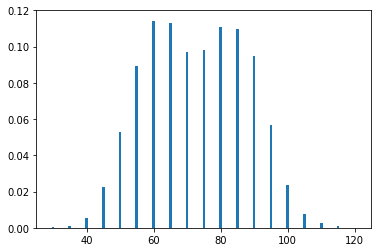

In [7]:
peso =  df['Peso']
peso_frecuencia = dict(Counter(peso))
peso_prob = {pe:c/len(peso) for pe, c in peso_frecuencia.items()}
plt.bar(peso_prob.keys(), peso_prob.values())
plt.show()

# Marginal condicional 
## $P(X_1|X_2=x_2) = P(Peso|Genero=hombre)$

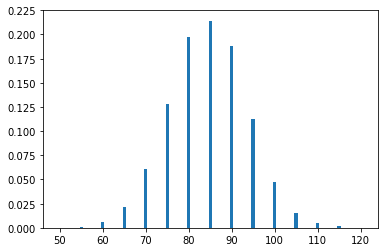

In [8]:
peso_H =  df[df['Genero'] == 'Hombre']['Peso']
peso_H_frecuencia = dict(Counter(peso_H))
peso_prob_H = {pe:c/len(peso_H) for pe, c in peso_H_frecuencia.items()}
plt.bar(peso_prob_H.keys(), peso_prob_H.values())
plt.show()

# Marginal condicional 
## $P(X_1|X_2=x_2) = P(Peso|Genero=mujer)$

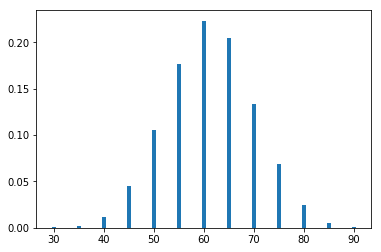

In [9]:
peso_M =  df[df['Genero'] == 'Mujer']['Peso']
peso_M_frecuencia = dict(Counter(peso_M))
peso_prob_M = {pe:c/len(peso_M) for pe, c in peso_M_frecuencia.items()}
plt.bar(peso_prob_M.keys(), peso_prob_M.values())
plt.show()

# Conjunta condicional 

\begin{equation}
P(X_1 = x_1,X_2 = x_2 | Hombre) = \frac{N_{x_1x_2H}}{N_H}
\end{equation}

\begin{equation}
P(X_1 = x_1,X_2 = x_2 | Mujer) = \frac{N_{x_1x_2M}}{N_M}
\end{equation}

## $P(X_1, X_2|X_3=x_3) = P(Peso, Altura|Genero=Hombre)$

Por simplicidad vamos a graficar frecuencias y no probabilidades, pero solo bastaría con normalizar

In [10]:
tuplas_H = []
for line in df[df['Genero'] == 'Hombre'][['Peso', 'Altura']].values:
    tuplas_H.append(tuple(line))
frecuencia_conjunta_H = dict(Counter(tuplas_H))

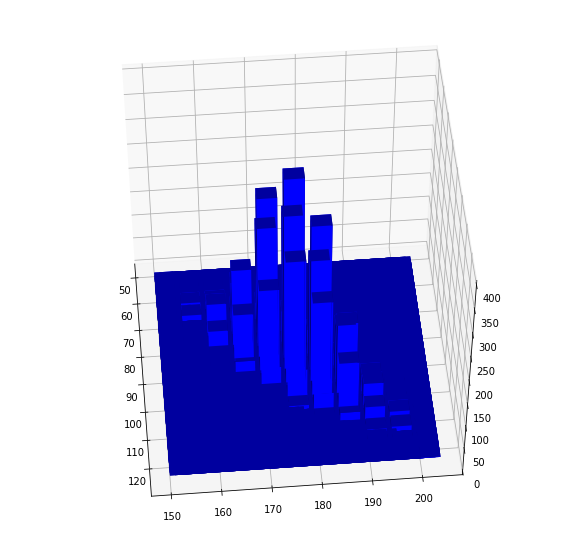

In [11]:
from helper import plot_joint_3d
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
conjunta_np = plot_joint_3d(frecuencia_conjunta_H, bins_width = 4, az=50, el=-5, ax=ax)

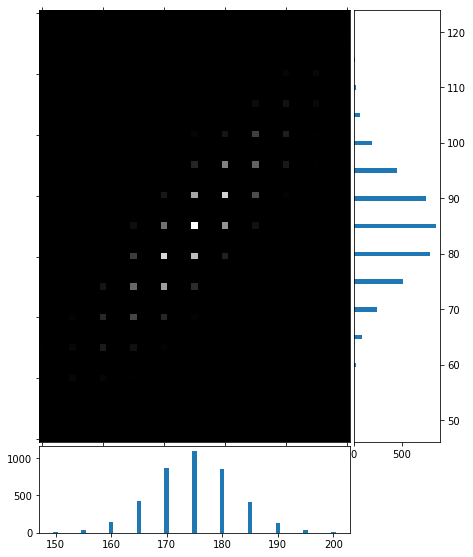

In [12]:
from helper import plot_joint_hists_dicts
conjunta_np, p_min, a_min = plot_joint_hists_dicts(frecuencia_conjunta_H)

# Conjunta condicional 
## $P(X_1, X_2|X_3=x_3) = P(Peso, Altura|Genero=Mujer)$

In [13]:
tuplas_M = []
for line in df[df['Genero'] == 'Mujer'][['Peso', 'Altura']].values:
    tuplas_M.append(tuple(line))
frecuencia_conjunta_M = dict(Counter(tuplas_M))

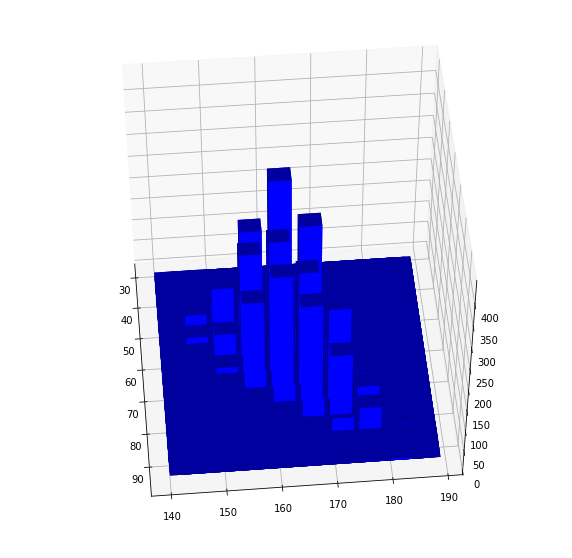

In [14]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
_ = plot_joint_3d(frecuencia_conjunta_M, bins_width = 4, az=50, el=-5, ax=ax)

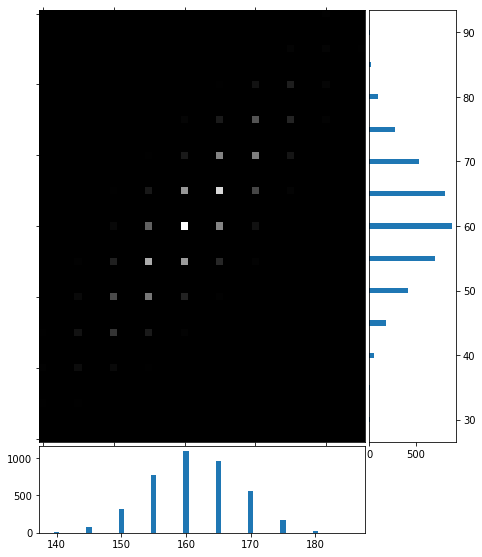

In [15]:
_ = plot_joint_hists_dicts(frecuencia_conjunta_M)

## $P(X_1|X_2<x_2, X_3=x_3) = P(Peso|Altura<160, Genero=Mujer)$

In [16]:
tuplas_c = []
for line in df[(df['Altura']<160) & (df['Genero'] == 'Mujer')][['Peso', 'Altura']].values:
    tuplas_c.append(tuple(line))
frecuencia_conjunta_c = dict(Counter(tuplas_c))

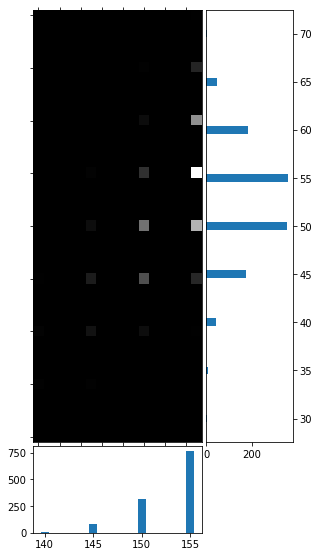

In [17]:
_ = plot_joint_hists_dicts(frecuencia_conjunta_c)